In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
import os
# Folder Path
path = r"D:\MACHINE LEARNING\Mentorship program\NLP Projects\NLP_Project_second\job_postings"

In [4]:
# # Change the directory
# os.chdir(path)
# file_list=os.listdir()
# # file_list.remove('desktop.ini')

# # Read text File 
# def read_html_file(file_path):
#     with open(file_path, encoding='utf8') as f:
#         S = BeautifulSoup(f.read(), 'lxml')
#         print(S.prettify())
# #         print(S)
# #         print(S('title'))
# #         print(S.body.prettify())

# # iterate through all file
# counter=0
# for file in file_list:
#     print(file)
#     counter=counter+1
#     # Check whether file is in text format or not
#     if file.endswith(".html"):
#         file_path = f"{path}\{file}"
  
#         # call read text file function
#         read_html_file(file_path)
# print(counter)

In [5]:
lst=[]

os.chdir(path)
file_list=os.listdir()

def read_html_file(file_path):
    with open(file_path, encoding='utf8') as f:
        S = BeautifulSoup(f.read(), 'html')
        lst.append(S.find_all('li'))
    

# iterate through all file
counter=0
for file in file_list:
#     print(file)
    counter=counter+1
    if file.endswith(".html"):
        file_path = f"{path}\{file}"
        read_html_file(file_path)
print(counter)

1459


In [6]:
lst1=[]

os.chdir(path)
file_list=os.listdir()

def read_html_file(file_path):
    with open(file_path, encoding='utf8') as f:
        S = BeautifulSoup(f.read(), 'lxml')
        lst1.append(S.find('title').contents)

# iterate through all file
counter=0
for file in file_list:
#     print(file)
    counter=counter+1
    if file.endswith(".html"):
        file_path = f"{path}\{file}"
        read_html_file(file_path)
print(counter)

1459


In [7]:
data1 = list(zip(file_list,lst1,lst))
df1 = pd.DataFrame(data1, columns = ['file_name','job_title','job_skills'])
df1
# with pd.option_context('display.max_colwidth', None):
#   display(df1['job_skills'][0])

,file_name,job_title,job_skills
0,001b92395ed0fb62.html,"[Data Scientist - Beavercreek, OH]",[[Use statistical research methods to analyze ...
1,00321a48d04fe754.html,"[Data Scientist - Seattle, WA 98101]",[[Interface with our internal engagement teams...
2,0079c11b2611349f.html,"[Data Scientist - Newark, CA]","[[ Design, develop, document and maintain mach..."
3,007d9d7b5c09d820.html,[Patient Care Assistant / PCA - Med/Surg (Faye...,[[Provides all personal care services in accor...
4,00bf37ae19c7dfd7.html,"[Data Manager / Analyst - Oakland, CA]",[[You possess excellent communication and rela...
...,...,...,...
1453,fe385aa11883568f.html,"[Data Scientist - Glen Mills, PA]","[[Use machine learning methods (e.g., cluster ..."
1454,fee42538d4a7bb9a.html,"[Data Analyst (Part-Time) - Austin, TX]",[[Performing ad-hoc statistical analysis (line...
1455,fefb9642ac28b85e.html,[Manager - Business Development (Central and E...,[[[Drive New Sales from prospective clients wi...
1456,ff0eb6d0b4da2289.html,[Natural Language Processing Undergraduate Int...,[[Design and implement experiments to test new...


In [8]:
lst2=[]
for i in range(len(df1)):
    strng = df1['job_title'][i][0].rpartition(' - ')
    lst2.append(strng[0]) 

In [9]:
df1['job_title']=lst2

In [10]:
df1.head()

,file_name,job_title,job_skills
0,001b92395ed0fb62.html,Data Scientist,[[Use statistical research methods to analyze ...
1,00321a48d04fe754.html,Data Scientist,[[Interface with our internal engagement teams...
2,0079c11b2611349f.html,Data Scientist,"[[ Design, develop, document and maintain mach..."
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,[[Provides all personal care services in accor...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,[[You possess excellent communication and rela...


In [11]:
# with pd.option_context('display.max_colwidth', None):
#   display(df1)

In [12]:
lst3={}
for i in range(len(df1)):
    lst3[i]=[]
    for j in range(len(df1['job_skills'][i])):
        strng = df1['job_skills'][i][j].text.lower()
        lst3[i].append(strng)         

In [13]:
len(lst3)

1458

In [14]:
df1['job_skills2']=lst3.values()

In [15]:
df1.head()

,file_name,job_title,job_skills,job_skills2
0,001b92395ed0fb62.html,Data Scientist,[[Use statistical research methods to analyze ...,[use statistical research methods to analyze d...
1,00321a48d04fe754.html,Data Scientist,[[Interface with our internal engagement teams...,[interface with our internal engagement teams ...
2,0079c11b2611349f.html,Data Scientist,"[[ Design, develop, document and maintain mach...","[ design, develop, document and maintain machi..."
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,[[Provides all personal care services in accor...,[provides all personal care services in accord...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,[[You possess excellent communication and rela...,[you possess excellent communication and relat...


In [16]:
lsst=[]
for i in range(len(df1)):
    st=' '.join(df1['job_skills2'][i])
    lsst.append(st)

In [17]:
df1['job_skills2']=lsst

In [18]:
df1

,file_name,job_title,job_skills,job_skills2
0,001b92395ed0fb62.html,Data Scientist,[[Use statistical research methods to analyze ...,use statistical research methods to analyze da...
1,00321a48d04fe754.html,Data Scientist,[[Interface with our internal engagement teams...,interface with our internal engagement teams a...
2,0079c11b2611349f.html,Data Scientist,"[[ Design, develop, document and maintain mach...","design, develop, document and maintain machin..."
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,[[Provides all personal care services in accor...,provides all personal care services in accorda...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,[[You possess excellent communication and rela...,you possess excellent communication and relati...
...,...,...,...,...
1453,fe385aa11883568f.html,Data Scientist,"[[Use machine learning methods (e.g., cluster ...","use machine learning methods (e.g., cluster an..."
1454,fee42538d4a7bb9a.html,Data Analyst (Part-Time),[[Performing ad-hoc statistical analysis (line...,performing ad-hoc statistical analysis (linear...
1455,fefb9642ac28b85e.html,Manager - Business Development (Central and Ea...,[[[Drive New Sales from prospective clients wi...,drive new sales from prospective clients with ...
1456,ff0eb6d0b4da2289.html,Natural Language Processing Undergraduate Inte...,[[Design and implement experiments to test new...,design and implement experiments to test new h...


In [19]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '',data)
df1['job_skills2']  = df1['job_skills2'] .apply(lambda x: cleaning_numbers(x))
df1['job_skills2'].head()

0    use statistical research methods to analyze da...
1    interface with our internal engagement teams a...
2     design, develop, document and maintain machin...
3    provides all personal care services in accorda...
4    you possess excellent communication and relati...
Name: job_skills2, dtype: object

In [20]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df1['job_skills2']=df1['job_skills2'].apply(lambda x: remove_punctuation(x))
df1['job_skills2'].head()

0    use statistical research methods to analyze da...
1    interface with our internal engagement teams a...
2     design develop document and maintain machine ...
3    provides all personal care services in accorda...
4    you possess excellent communication and relati...
Name: job_skills2, dtype: object

In [21]:
import contractions
def expanded_text(sentence):
    return contractions.fix(sentence)
    
df1['job_skills2']= df1['job_skills2'].apply(expanded_text)
df1['job_skills2'].head()

0    use statistical research methods to analyze da...
1    interface with our internal engagement teams a...
2     design develop document and maintain machine ...
3    provides all personal care services in accorda...
4    you possess excellent communication and relati...
Name: job_skills2, dtype: object

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyambada\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
from nltk.tokenize import RegexpTokenizer 
def tokenize(sentence):
    return RegexpTokenizer(r'\w+').tokenize(sentence)
    
df1['job_skills2']= df1['job_skills2'].apply(tokenize)
df1['job_skills2'] =df1['job_skills2'].apply(' '.join)
df1.head()

,file_name,job_title,job_skills,job_skills2
0,001b92395ed0fb62.html,Data Scientist,[[Use statistical research methods to analyze ...,use statistical research methods to analyze da...
1,00321a48d04fe754.html,Data Scientist,[[Interface with our internal engagement teams...,interface with our internal engagement teams a...
2,0079c11b2611349f.html,Data Scientist,"[[ Design, develop, document and maintain mach...",design develop document and maintain machine l...
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,[[Provides all personal care services in accor...,provides all personal care services in accorda...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,[[You possess excellent communication and rela...,you possess excellent communication and relati...


In [25]:
with open(r"D:\MACHINE LEARNING\Mentorship program\NLP Projects\NLP_Project_second\resume.txt",encoding='utf8') as f:
    c=[line.strip() for line in f.readlines()]
    new_t= " ".join(c)

In [26]:
new_text=remove_punctuation(new_t)
new_text=cleaning_numbers(new_text)

In [27]:
from nltk.tokenize import RegexpTokenizer 
def tokenize(sentence):
    return RegexpTokenizer(r'\w+').tokenize(sentence)
    
res_tokens=tokenize(new_text)

In [28]:
res_tokens=[word.lower() for word in res_tokens]

In [29]:
res_tokens=" ".join(res_tokens)

In [30]:
df1.head(2)

,file_name,job_title,job_skills,job_skills2
0,001b92395ed0fb62.html,Data Scientist,[[Use statistical research methods to analyze ...,use statistical research methods to analyze da...
1,00321a48d04fe754.html,Data Scientist,[[Interface with our internal engagement teams...,interface with our internal engagement teams a...


In [31]:
df2=df1.drop('job_skills',axis=1)

In [32]:
df2.rename(columns = {'job_skills2':'job_skills'}, inplace = True)

In [33]:
df2

,file_name,job_title,job_skills
0,001b92395ed0fb62.html,Data Scientist,use statistical research methods to analyze da...
1,00321a48d04fe754.html,Data Scientist,interface with our internal engagement teams a...
2,0079c11b2611349f.html,Data Scientist,design develop document and maintain machine l...
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,provides all personal care services in accorda...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,you possess excellent communication and relati...
...,...,...,...
1453,fe385aa11883568f.html,Data Scientist,use machine learning methods eg cluster analys...
1454,fee42538d4a7bb9a.html,Data Analyst (Part-Time),performing adhoc statistical analysis linear r...
1455,fefb9642ac28b85e.html,Manager - Business Development (Central and Ea...,drive new sales from prospective clients with ...
1456,ff0eb6d0b4da2289.html,Natural Language Processing Undergraduate Inte...,design and implement experiments to test new h...


In [34]:
df2.loc[1458] = ['resume.txt','resume',res_tokens]

In [35]:
df2

,file_name,job_title,job_skills
0,001b92395ed0fb62.html,Data Scientist,use statistical research methods to analyze da...
1,00321a48d04fe754.html,Data Scientist,interface with our internal engagement teams a...
2,0079c11b2611349f.html,Data Scientist,design develop document and maintain machine l...
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,provides all personal care services in accorda...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,you possess excellent communication and relati...
...,...,...,...
1454,fee42538d4a7bb9a.html,Data Analyst (Part-Time),performing adhoc statistical analysis linear r...
1455,fefb9642ac28b85e.html,Manager - Business Development (Central and Ea...,drive new sales from prospective clients with ...
1456,ff0eb6d0b4da2289.html,Natural Language Processing Undergraduate Inte...,design and implement experiments to test new h...
1457,ff81a90403a3f37e.html,Political Staffer,relevant year preferred bonuses one location h...


In [36]:
specific_words  = ['using', 'ability', 'will','including','understanding','experience','improve','provide','within',' and',
                   'please','make','lotion','team','knowledge','work','year','working','skill','etc','pig','tssci','targeting',
                   'andor','familiarity','must',' ing',' one',' eg']
for stop in specific_words:
    df2['job_skills']=df2['job_skills'].str.replace(stop,'',case=False)

In [37]:
df2['job_skills']=df2['job_skills'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')

C:\Users\Priyambada\AppData\Local\Temp\ipykernel_21496\3384029422.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['job_skills']=df2['job_skills'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')


In [38]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
data = list(df2['job_skills'])
tagged_data = [TaggedDocument(words = word_tokenize(_d.lower()), tags = [str(i)]) for i, _d in enumerate(data)]

In [39]:
# Model initialization
model = Doc2Vec(vector_size = 50,
min_count = 5,
epochs = 5,
alpha = 0.001
)

In [40]:
# Vocabulary building
model.build_vocab(tagged_data )
# Get the vocabulary keys
keys = model.wv.key_to_index.keys()
# Print the length of the vocabulary keys
print(len(keys))

4659


In [41]:
# Train the model
for epoch in range(model.epochs):
#     print(f"Training epoch {epoch+1}/{model.epochs}")
    model.train(tagged_data, 
                total_examples=model.corpus_count, 
                epochs=model.epochs)

model.save('cv_job_maching.model')
# print("Model saved")

In [42]:
from numpy.linalg import norm
model = Doc2Vec.load('cv_job_maching.model')
v1 = model.infer_vector(df2['job_skills'][1458].split())
cos_sim_new = []
for i in range (len(df2)):
    v2 = model.infer_vector(df2['job_skills'][i].split())
    cosine_similarity = (np.dot(np.array(v1), np.array(v2))) / (norm(np.array(v1)) * norm(np.array(v2)))
    cos_sim_new.append(round(cosine_similarity, 3))

In [43]:
df2['cos_sim_new']=cos_sim_new

In [44]:
df2

,file_name,job_title,job_skills,cos_sim_new
0,001b92395ed0fb62.html,Data Scientist,use statistical research methods to analyze da...,0.507
1,00321a48d04fe754.html,Data Scientist,interface with our internal engagement clients...,0.547
2,0079c11b2611349f.html,Data Scientist,design develop document maintain machine learn...,0.552
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,all personal care services in accordance with...,0.635
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,you possess excellent communication relationsh...,0.671
...,...,...,...,...
1454,fee42538d4a7bb9a.html,Data Analyst (Part-Time),performing adhoc statistical analysis linear r...,0.673
1455,fefb9642ac28b85e.html,Manager - Business Development (Central and Ea...,drive new sales from prospective clients with ...,0.690
1456,ff0eb6d0b4da2289.html,Natural Language Processing Undergraduate Inte...,design implement experiments to test new hypot...,0.683
1457,ff81a90403a3f37e.html,Political Staffer,relevant preferred bonuses location health ins...,0.371


In [45]:
df2.sort_values(by='cos_sim_new',ascending=False)

,file_name,job_title,job_skills,cos_sim_new
1458,resume.txt,resume,developed prob simulations numpy assessed onl...,1.000
401,41181d07cc124ae0.html,Staff ML Engineer - Applied Modeling - Cortex,approximate nearest neighbor algorithms relate...,0.807
238,260c13820dbd4c63.html,Data Engineer,develop data processes for data modeling minin...,0.789
748,7c930e87bc4d9ff5.html,Quality Engineer (Electronic Industry),collaborates with technical operations compone...,0.757
1329,e6557a1e5d1de625.html,Transaction Advisory Services- Valuation Model...,advising clients on corporate finance the valu...,0.751
...,...,...,...,...
649,6bcbe2dd10af4e0e.html,PCA - PCU Full Time,,-0.221
636,69bf0292975879fa.html,Senior Supplier Development Engineer,,-0.240
1361,ec81cd801ad999d9.html,QSR Store Assistant,,-0.240
1179,cd356180d96f0557.html,Social Network Analysis and Document Generation,,-0.268


In [46]:
df3=df2[df2['cos_sim_new']>.1]

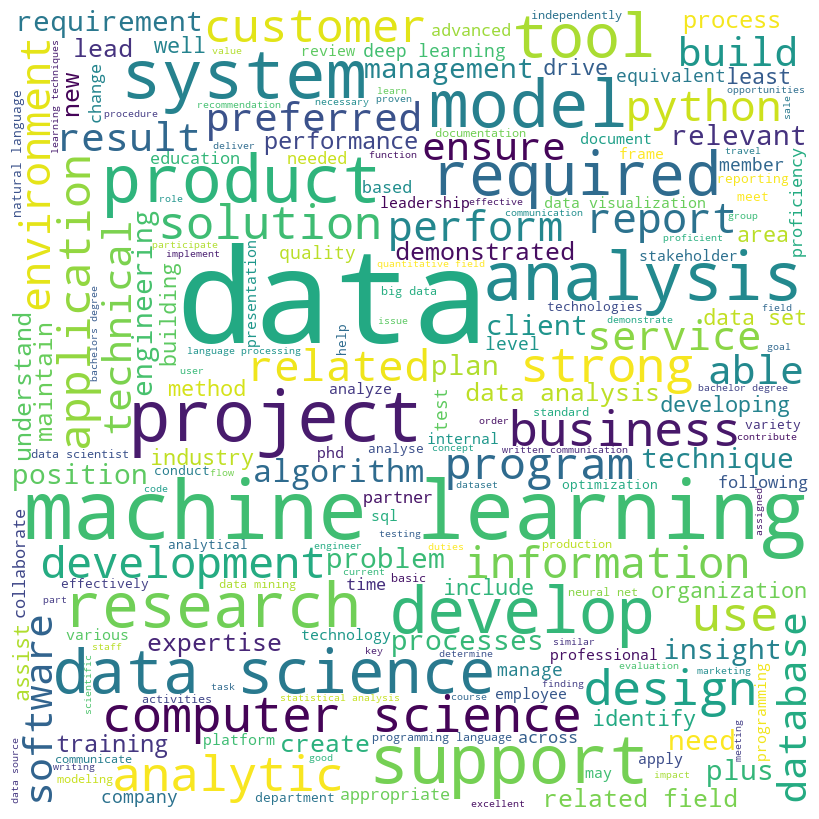

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,random_state=101).generate(" ".join(df3['job_skills'][:-1]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [48]:
vec= TfidfVectorizer(max_df=1.0, max_features=200000,min_df=0.2, stop_words='english',
                                 use_idf=True)
vec_matrix = vec.fit_transform(df3['job_skills'])
# vec_matrix = vec_matrix.toarray()

print ("In total, there are " + str(vec_matrix.shape[0]) + \
      " job postings and " + str(vec_matrix.shape[1]) + " terms.")

In total, there are 1320 job postings and 76 terms.


In [49]:
from sklearn.decomposition import TruncatedSVD

In [69]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(vec_matrix )
tsvd_mat = tsvd.transform(vec_matrix)

In [70]:
# svd = TruncatedSVD(n_components=49)
# svd.fit(vec_matrix)

# # Calculate cumulative explained variance
# explained_variance = np.cumsum(svd.explained_variance_ratio_)

# # Plot cumulative explained variance
# plt.plot(range(1,49+ 1), explained_variance, marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.grid()
# plt.show()

In [71]:
# Set the desired explained variance threshold
# desired_variance = 0.95

# # Find the minimum number of components that achieve the desired variance
# n_components = np.argmax(np.cumsum(svd.explained_variance_ratio_) >= desired_variance) + 1
# n_components

In [72]:
tsvd_mat.shape

(1320, 2)

In [73]:
from sklearn.cluster import KMeans

num_clusters = 3
km = KMeans(n_clusters=num_clusters,random_state=42)
km.fit(tsvd_mat)
clusters = km.labels_.tolist()

In [74]:
df3['cluster_labels']=km.labels_

C:\Users\Priyambada\AppData\Local\Temp\ipykernel_21496\2528371189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cluster_labels']=km.labels_


In [75]:
df3

,file_name,job_title,job_skills,cos_sim_new,cluster_labels
0,001b92395ed0fb62.html,Data Scientist,use statistical research methods to analyze da...,0.507,1
1,00321a48d04fe754.html,Data Scientist,interface with our internal engagement clients...,0.547,2
2,0079c11b2611349f.html,Data Scientist,design develop document maintain machine learn...,0.552,1
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,all personal care services in accordance with...,0.635,0
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,you possess excellent communication relationsh...,0.671,0
...,...,...,...,...,...
1454,fee42538d4a7bb9a.html,Data Analyst (Part-Time),performing adhoc statistical analysis linear r...,0.673,2
1455,fefb9642ac28b85e.html,Manager - Business Development (Central and Ea...,drive new sales from prospective clients with ...,0.690,0
1456,ff0eb6d0b4da2289.html,Natural Language Processing Undergraduate Inte...,design implement experiments to test new hypot...,0.683,2
1457,ff81a90403a3f37e.html,Political Staffer,relevant preferred bonuses location health ins...,0.371,0


In [76]:
print ("Number of jobs included in each cluster:")
df3['cluster_labels'].value_counts().to_frame()

Number of jobs included in each cluster:


,cluster_labels
0,526
2,471
1,323


In [77]:
km.cluster_centers_.shape

(3, 2)

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

def wordcloud(i):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,random_state=101).generate(" ".join(df3[df3['cluster_labels']==i]['job_skills'][:-1]))
    # plot the WordCloud image
    plt.figure(figsize = (5,5), facecolor = None, dpi=200)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

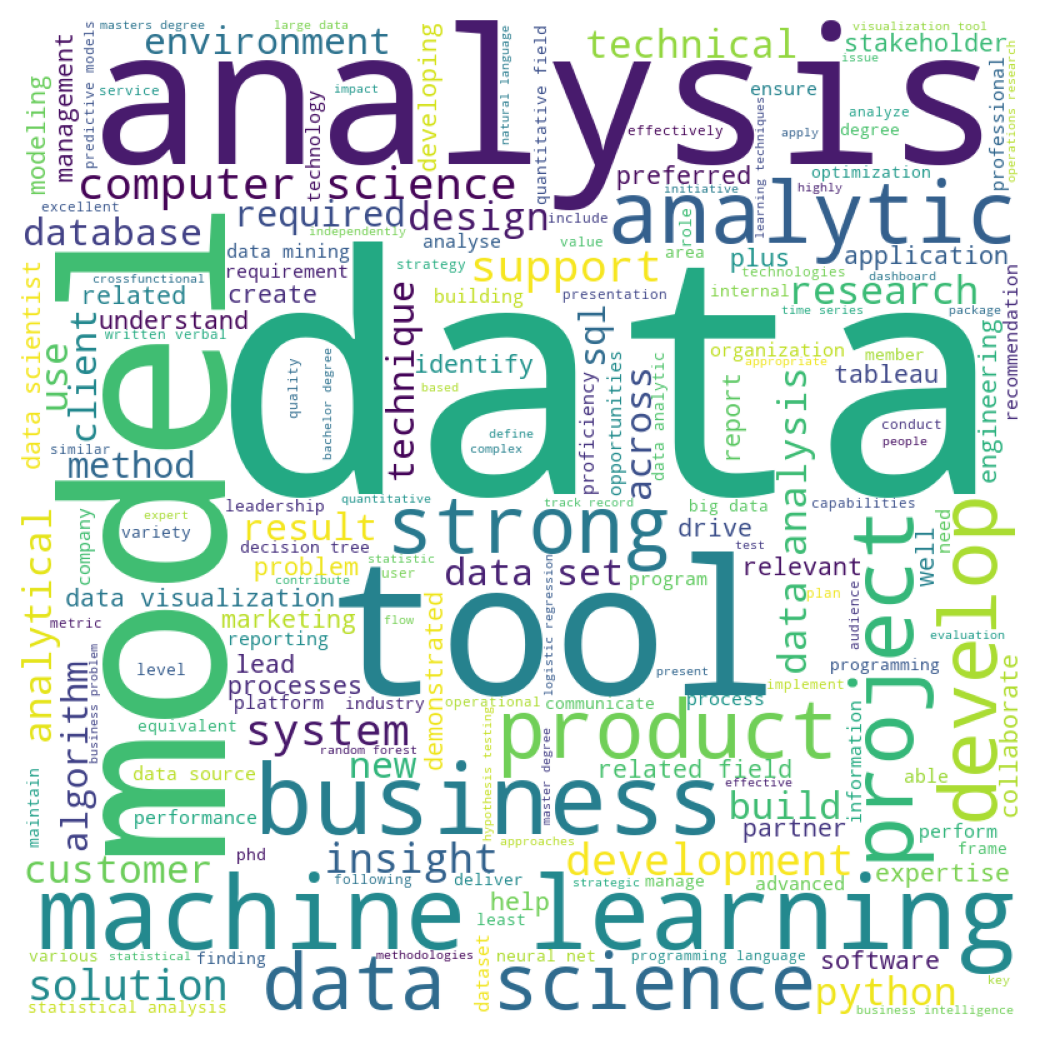

In [79]:
wordcloud(2)

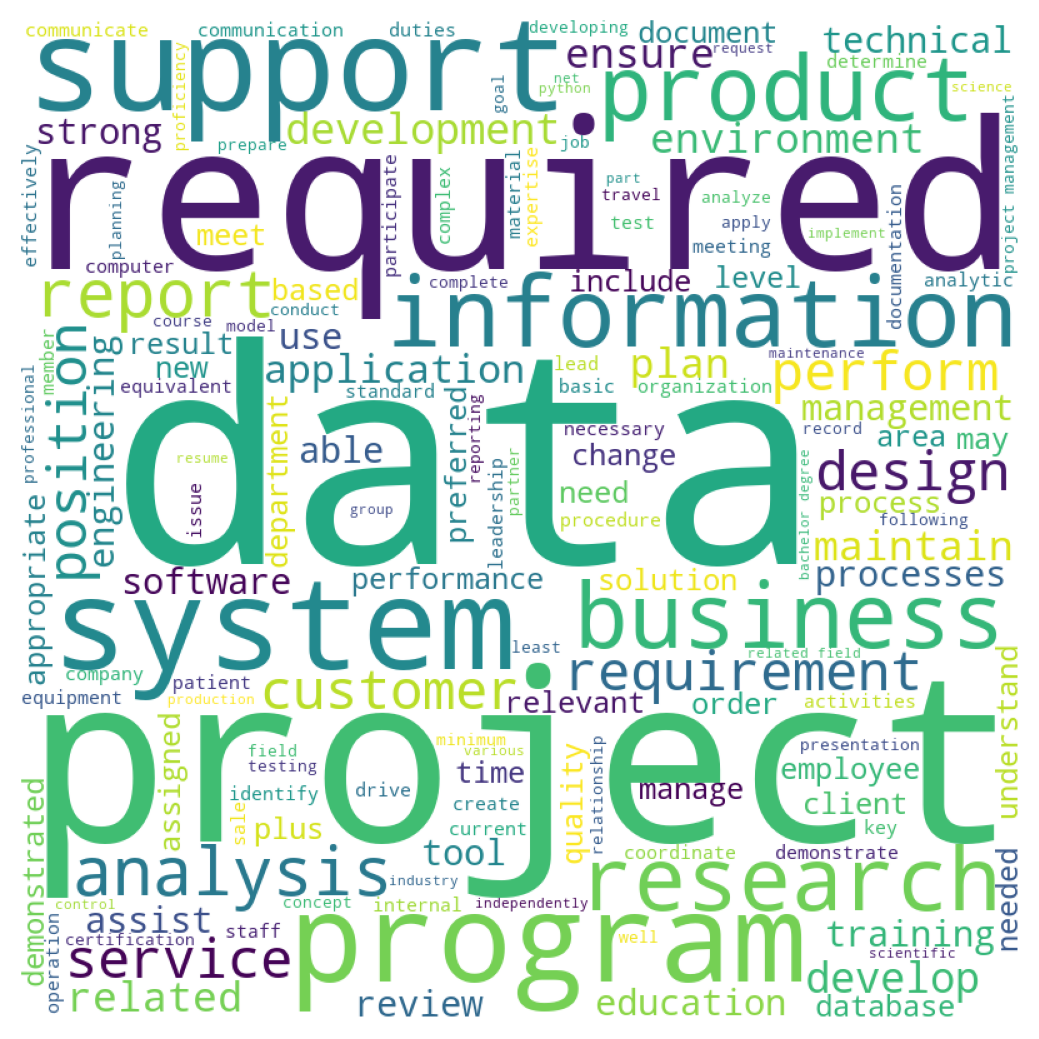

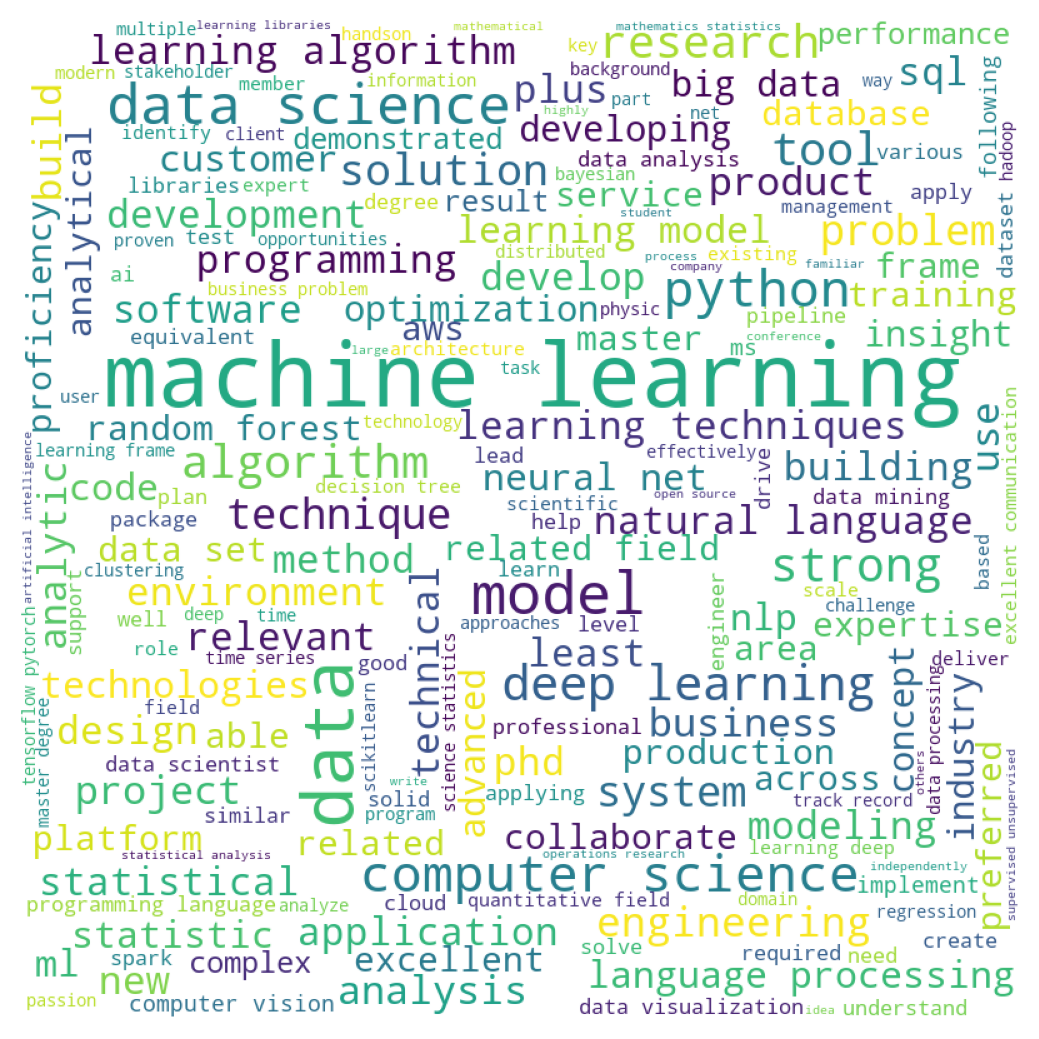

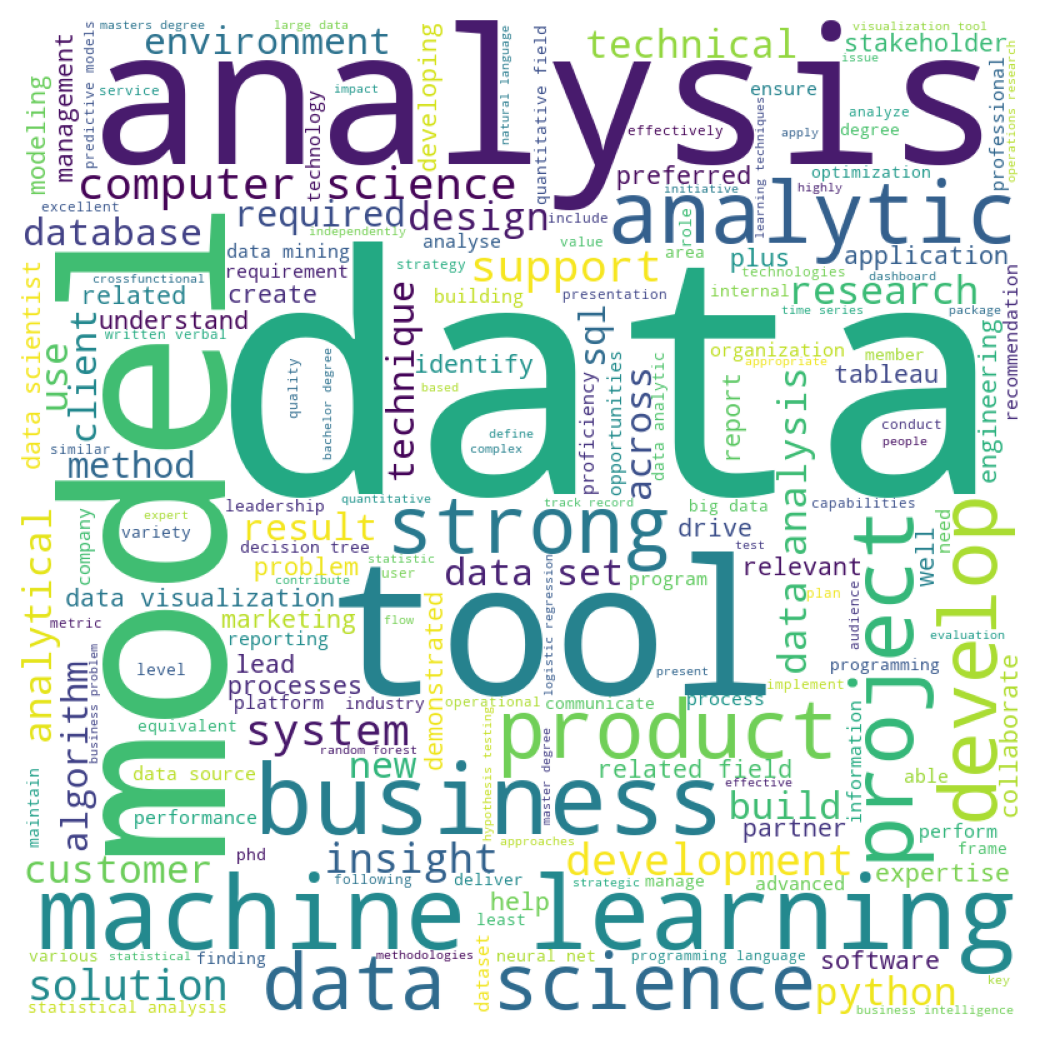

(None, None, None)

In [80]:
wordcloud(0),wordcloud(1),wordcloud(2)